# Fraud Detection INSAID

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df=pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Null Value Check 

In [41]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No null Values

In [42]:
df.drop(['step','nameOrig','nameDest'],inplace=True,axis=1)

In [43]:
# false=np.where(df.isFraud == 0)
# true=np.where(df.isFraud == 1)
# df.loc[false[0],'isFraud']=False
# df.loc[true[0],'isFraud']=True

In [44]:
false_flag=np.where(df.isFlaggedFraud == 0)
true_flag=np.where(df.isFlaggedFraud == 1)
df.loc[false_flag[0],'isFlaggedFraud'] = False
df.loc[true_flag[0],'isFlaggedFraud'] = True

In [45]:
season_dummies = pd.get_dummies(df.type, prefix="type")
df = pd.concat([df,season_dummies],axis='columns')
df.drop('type',axis='columns',inplace=True)

In [46]:
false_flag=np.where(df.type_CASH_OUT == 0)
true_flag=np.where(df.type_CASH_OUT == 1)
df.loc[false_flag[0],'type_CASH_OUT'] = False
df.loc[true_flag[0],'type_CASH_OUT'] = True

In [47]:
false_flag=np.where(df.type_CASH_IN == 0)
true_flag=np.where(df.type_CASH_IN == 1)
df.loc[false_flag[0],'type_CASH_IN'] = False
df.loc[true_flag[0],'type_CASH_IN'] = True

In [48]:
false_flag=np.where(df.type_DEBIT == 0)
true_flag=np.where(df.type_DEBIT == 1)
df.loc[false_flag[0],'type_DEBIT'] = False
df.loc[true_flag[0],'type_DEBIT'] = True

In [49]:
false_flag=np.where(df.type_PAYMENT == 0)
true_flag=np.where(df.type_PAYMENT == 1)
df.loc[false_flag[0],'type_PAYMENT'] = False
df.loc[true_flag[0],'type_PAYMENT'] = True

In [50]:
false_flag=np.where(df.type_TRANSFER == 0)
true_flag=np.where(df.type_TRANSFER == 1)
df.loc[false_flag[0],'type_TRANSFER'] = False
df.loc[true_flag[0],'type_TRANSFER'] = True

In [58]:
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import roc_curve
def AUC_plot(model):
    ns_probs = [0 for _ in range(len(y_test))]
    lr_probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (lr_auc))
    #  calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate') 
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

In [63]:
df[[x for x in df.columns if df[x].dtype != 'object']].describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [51]:
df[[x for x in df.columns if df[x].dtype != 'object']] 

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,9839.64,170136.00,160296.36,0.00,0.00,0
1,1864.28,21249.00,19384.72,0.00,0.00,0
2,181.00,181.00,0.00,0.00,0.00,1
3,181.00,181.00,0.00,21182.00,0.00,1
4,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,850002.52,850002.52,0.00,0.00,0.00,1


In [52]:
df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,160296.36,0.00,0.00,0,False,False,False,False,True,False
1,1864.28,21249.00,19384.72,0.00,0.00,0,False,False,False,False,True,False
2,181.00,181.00,0.00,0.00,0.00,1,False,False,False,False,False,True
3,181.00,181.00,0.00,21182.00,0.00,1,False,False,True,False,False,False
4,11668.14,41554.00,29885.86,0.00,0.00,0,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,False,False,True,False,False,False
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,False,False,False,False,False,True
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,False,False,True,False,False,False
6362618,850002.52,850002.52,0.00,0.00,0.00,1,False,False,False,False,False,True


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df.drop('isFraud',axis=1)
y = df.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# rfc = RandomForestClassifier(criterion='entropy', n_estimators=200).fit(X_train, y_train)
# s = rfc.score(X_test, y_test)
# print(s)

0.9996867118681717


In [54]:
import pickle
# pickle.dump(rfc,open('test2.pkl','wb'))

In [56]:
model = pickle.load(open('test2.pkl','rb'))

0.9999060135604515
0.9996867118681717


Accuracy Test : 0.9996867118681717
Accuracy Train: 1.0
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.996


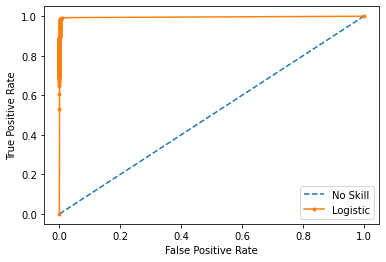

In [59]:
pred=rfc.predict(X_test)
print('Accuracy Test :',rfc.score(X_test,y_test))
print('Accuracy Train:',rfc.score(X_train,y_train))


AUC_plot(rfc)

In [60]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[1906290      77]
 [    521    1898]]
